# `feature_selection_with_logistic_regression.ipynb`

### Author: Anthony Hein

#### Last updated: 11/30/2021

# Overview:

Observe the features on the logistic regression model to determine which are important.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `X_test_preprocess_without_race.csv`

In [3]:
X_test = pd.read_csv(f"{BASE_DIR}/data/analysis/X_test_preprocess_without_race.csv", low_memory=False)
X_test.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.200,0.865544,0.847264,0.853154,0.025,0.200,0.300,0.840533,0.850856,0.864844
1,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.150,0.864781,0.840533,0.855519,0.025,0.025,0.025,0.840533,0.840533,0.840533
2,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.075,0.838534,0.843337,0.846422,0.200,0.100,0.125,0.853412,0.842583,0.847859
3,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.851685,0.849673,0.854624,0.150,0.250,0.200,0.849673,0.854624,0.858051
4,0.230769,0.333333,0.03268,0.0,0.0,0.344828,0.74359,0.001053,0.49501,0.225,...,0.250,0.847892,0.842776,0.862423,0.175,0.075,0.275,0.853634,0.844529,0.862845


In [4]:
X_test.shape

(114392, 144)

---

---

## Combine Figures

In [5]:
drop_cols = [
    'horse1_jockey_prev_1_position_temp',
    'horse1_jockey_prev_2_position_temp',
    'horse1_jockey_prev_3_position_temp',
    'horse1_jockey_prev_1_finishing_time_ratio_temp',
    'horse1_jockey_prev_2_finishing_time_ratio_temp',
    'horse1_jockey_prev_3_finishing_time_ratio_temp',
    'horse1_jockey_prev_1_position_msl',
    'horse1_jockey_prev_2_position_msl',
    'horse1_jockey_prev_3_position_msl',
    'horse1_jockey_prev_1_finishing_time_ratio_msl',
    'horse1_jockey_prev_2_finishing_time_ratio_msl',
    'horse1_jockey_prev_3_finishing_time_ratio_msl',
    'horse1_jockey_prev_1_position_rain',
    'horse1_jockey_prev_2_position_rain',
    'horse1_jockey_prev_3_position_rain',
    'horse1_jockey_prev_1_finishing_time_ratio_rain',
    'horse1_jockey_prev_2_finishing_time_ratio_rain',
    'horse1_jockey_prev_3_finishing_time_ratio_rain',
    'horse1_jockey_prev_1_position_rhum',
    'horse1_jockey_prev_2_position_rhum',
    'horse1_jockey_prev_3_position_rhum',
    'horse1_jockey_prev_1_finishing_time_ratio_rhum',
    'horse1_jockey_prev_2_finishing_time_ratio_rhum',
    'horse1_jockey_prev_3_finishing_time_ratio_rhum',
    'horse2_jockey_prev_1_position_temp',
    'horse2_jockey_prev_2_position_temp',
    'horse2_jockey_prev_3_position_temp',
    'horse2_jockey_prev_1_finishing_time_ratio_temp',
    'horse2_jockey_prev_2_finishing_time_ratio_temp',
    'horse2_jockey_prev_3_finishing_time_ratio_temp',
    'horse2_jockey_prev_1_position_msl',
    'horse2_jockey_prev_2_position_msl',
    'horse2_jockey_prev_3_position_msl',
    'horse2_jockey_prev_1_finishing_time_ratio_msl',
    'horse2_jockey_prev_2_finishing_time_ratio_msl',
    'horse2_jockey_prev_3_finishing_time_ratio_msl',
    'horse2_jockey_prev_1_position_rain',
    'horse2_jockey_prev_2_position_rain',
    'horse2_jockey_prev_3_position_rain',
    'horse2_jockey_prev_1_finishing_time_ratio_rain',
    'horse2_jockey_prev_2_finishing_time_ratio_rain',
    'horse2_jockey_prev_3_finishing_time_ratio_rain',
    'horse2_jockey_prev_1_position_rhum',
    'horse2_jockey_prev_2_position_rhum',
    'horse2_jockey_prev_3_position_rhum',
    'horse2_jockey_prev_1_finishing_time_ratio_rhum',
    'horse2_jockey_prev_2_finishing_time_ratio_rhum',
    'horse2_jockey_prev_3_finishing_time_ratio_rhum'
]

In [6]:
X_test_with_weather = pd.read_csv(f"{BASE_DIR}/data/analysis/X_test_preprocess_without_race.csv", low_memory=False)
X_test_without_weather = X_test_with_weather.drop(columns=drop_cols)

In [7]:
with open(f"{BASE_DIR}/data/analysis/logistic_regression/without_race_with_weather.pkl",'rb') as f:
    lr_with_weather = pickle.load(f)

with open(f"{BASE_DIR}/data/analysis/logistic_regression/without_race_without_weather.pkl",'rb') as f:
    lr_without_weather = pickle.load(f)

In [8]:
sorted_features_with_weather_incl_weather = np.array(X_test_with_weather.columns)[np.flip(np.argsort(np.absolute(lr_with_weather.coef_)))][0]
sorted_features_without_weather = np.array(X_test_without_weather.columns)[np.flip(np.argsort(np.absolute(lr_without_weather.coef_)))][0]

In [9]:
sorted_features_with_weather = [
    x for
    x in
    sorted_features_with_weather_incl_weather
    if x in sorted_features_without_weather
]

In [10]:
horse_with_weather = []
unconditioned_with_weather = []
course_with_weather = []
metric_with_weather = []
ncond_with_weather = []
runners_with_weather = []
month_with_weather = []
temp_with_weather = []
msl_with_weather = []
rain_with_weather = []
rhum_with_weather = []

horse_feature_with_weather = []
unconditioned_feature_with_weather = []
course_feature_with_weather = []
metric_feature_with_weather = []
ncond_feature_with_weather = []
runners_feature_with_weather = []
month_feature_with_weather = []
temp_feature_with_weather = []
msl_feature_with_weather = []
rain_feature_with_weather = []
rhum_feature_with_weather = []

for i, feature in enumerate(sorted_features_with_weather):
    if "jockey" in feature:
        if "course" in feature:
            course_with_weather.append(i)
            course_feature_with_weather.append(feature)
        elif "metric" in feature:
            metric_with_weather.append(i)
            metric_feature_with_weather.append(feature)
        elif "ncond" in feature:
            ncond_with_weather.append(i)
            ncond_feature_with_weather.append(feature)
        elif "runners" in feature:
            runners_with_weather.append(i)
            runners_feature_with_weather.append(feature)
        elif "month" in feature:
            month_with_weather.append(i)
            month_feature_with_weather.append(feature)
        elif "temp" in feature:
            temp_with_weather.append(i)
            temp_feature_with_weather.append(feature)
        elif "msl" in feature:
            msl_with_weather.append(i)
            msl_feature_with_weather.append(feature)
        elif "rain" in feature:
            rain_with_weather.append(i)
            rain_feature_with_weather.append(feature)
        elif "rhum" in feature:
            rhum_with_weather.append(i)
            rhum_feature_with_weather.append(feature)
        else:
            unconditioned_with_weather.append(i)
            unconditioned_feature_with_weather.append(feature)
    else:
        horse_with_weather.append(i)
        horse_feature_with_weather.append(feature)

In [21]:
horse_with_weather_incl_weather = []
unconditioned_with_weather_incl_weather = []
course_with_weather_incl_weather = []
metric_with_weather_incl_weather = []
ncond_with_weather_incl_weather = []
runners_with_weather_incl_weather = []
month_with_weather_incl_weather = []
temp_with_weather_incl_weather = []
msl_with_weather_incl_weather = []
rain_with_weather_incl_weather = []
rhum_with_weather_incl_weather = []

horse_feature_with_weather_incl_weather = []
unconditioned_feature_with_weather_incl_weather = []
course_feature_with_weather_incl_weather = []
metric_feature_with_weather_incl_weather = []
ncond_feature_with_weather_incl_weather = []
runners_feature_with_weather_incl_weather = []
month_feature_with_weather_incl_weather = []
temp_feature_with_weather_incl_weather = []
msl_feature_with_weather_incl_weather = []
rain_feature_with_weather_incl_weather = []
rhum_feature_with_weather_incl_weather = []

for i, feature in enumerate(sorted_features_with_weather_incl_weather):
    if "jockey" in feature:
        if "course" in feature:
            course_with_weather_incl_weather.append(i)
            course_feature_with_weather_incl_weather.append(feature)
        elif "metric" in feature:
            metric_with_weather_incl_weather.append(i)
            metric_feature_with_weather_incl_weather.append(feature)
        elif "ncond" in feature:
            ncond_with_weather_incl_weather.append(i)
            ncond_feature_with_weather_incl_weather.append(feature)
        elif "runners" in feature:
            runners_with_weather_incl_weather.append(i)
            runners_feature_with_weather_incl_weather.append(feature)
        elif "month" in feature:
            month_with_weather_incl_weather.append(i)
            month_feature_with_weather_incl_weather.append(feature)
        elif "temp" in feature:
            temp_with_weather_incl_weather.append(i)
            temp_feature_with_weather_incl_weather.append(feature)
        elif "msl" in feature:
            msl_with_weather_incl_weather.append(i)
            msl_feature_with_weather_incl_weather.append(feature)
        elif "rain" in feature:
            rain_with_weather_incl_weather.append(i)
            rain_feature_with_weather_incl_weather.append(feature)
        elif "rhum" in feature:
            rhum_with_weather_incl_weather.append(i)
            rhum_feature_with_weather_incl_weather.append(feature)
        else:
            unconditioned_with_weather_incl_weather.append(i)
            unconditioned_feature_with_weather_incl_weather.append(feature)
    else:
        horse_with_weather_incl_weather.append(i)
        horse_feature_with_weather_incl_weather.append(feature)

In [11]:
horse_without_weather = []
unconditioned_without_weather = []
course_without_weather = []
metric_without_weather = []
ncond_without_weather = []
runners_without_weather = []
month_without_weather = []

horse_feature_without_weather = []
unconditioned_feature_without_weather = []
course_feature_without_weather = []
metric_feature_without_weather = []
ncond_feature_without_weather = []
runners_feature_without_weather = []
month_feature_without_weather = []

for i, feature in enumerate(sorted_features_without_weather):
    if "jockey" in feature:
        if "course" in feature:
            course_without_weather.append(i)
            course_feature_without_weather.append(feature)
        elif "metric" in feature:
            metric_without_weather.append(i)
            metric_feature_without_weather.append(feature)
        elif "ncond" in feature:
            ncond_without_weather.append(i)
            ncond_feature_without_weather.append(feature)
        elif "runners" in feature:
            runners_without_weather.append(i)
            runners_feature_without_weather.append(feature)
        elif "month" in feature:
            month_without_weather.append(i)
            month_feature_without_weather.append(feature)
        else:
            unconditioned_without_weather.append(i)
            unconditioned_feature_without_weather.append(feature)
    else:
        horse_without_weather.append(i)
        horse_feature_without_weather.append(feature)

In [12]:
position_with_weather = []
finishing_time_with_weather = []
other_with_weather = []

position_feature_with_weather = []
finishing_time_feature_with_weather = []
other_feature_with_weather = []

for i, feature in enumerate(sorted_features_with_weather):
    if "jockey" in feature:
        if "position" in feature:
            position_with_weather.append(i)
            position_feature_with_weather.append(feature)
        elif "finishing_time" in feature:
            finishing_time_with_weather.append(i)
            finishing_time_feature_with_weather.append(feature)
        else:
            other_with_weather.append(i)
            other_feature_with_weather.append(feature)
    else:
        other_with_weather.append(i)
        other_feature_with_weather.append(feature)

In [22]:
position_with_weather_incl_weather = []
finishing_time_with_weather_incl_weather = []
other_with_weather_incl_weather = []

position_feature_with_weather_incl_weather = []
finishing_time_feature_with_weather_incl_weather = []
other_feature_with_weather_incl_weather = []

for i, feature in enumerate(sorted_features_with_weather_incl_weather):
    if "jockey" in feature:
        if "position" in feature:
            position_with_weather_incl_weather.append(i)
            position_feature_with_weather_incl_weather.append(feature)
        elif "finishing_time" in feature:
            finishing_time_with_weather_incl_weather.append(i)
            finishing_time_feature_with_weather_incl_weather.append(feature)
        else:
            other_with_weather_incl_weather.append(i)
            other_feature_with_weather_incl_weather.append(feature)
    else:
        other_with_weather_incl_weather.append(i)
        other_feature_with_weather_incl_weather.append(feature)

In [13]:
position_without_weather = []
finishing_time_without_weather = []
other_without_weather = []

position_feature_without_weather = []
finishing_time_feature_without_weather = []
other_feature_without_weather = []

for i, feature in enumerate(sorted_features_without_weather):
    if "jockey" in feature:
        if "position" in feature:
            position_without_weather.append(i)
            position_feature_without_weather.append(feature)
        elif "finishing_time" in feature:
            finishing_time_without_weather.append(i)
            finishing_time_feature_without_weather.append(feature)
        else:
            other_without_weather.append(i)
            other_feature_without_weather.append(feature)
    else:
        other_without_weather.append(i)
        other_feature_without_weather.append(feature)

In [14]:
first_with_weather = []
second_with_weather = []
third_with_weather = []

first_feature_with_weather = []
second_feature_with_weather = []
third_feature_with_weather = []

for i, feature in enumerate(sorted_features_with_weather):
    if "jockey" in feature:
        if "prev_1" in feature:
            first_with_weather.append(i)
            first_feature_with_weather.append(feature)
        elif "prev_2" in feature:
            second_with_weather.append(i)
            second_feature_with_weather.append(feature)
        elif "prev_3" in feature:
            third_with_weather.append(i)
            third_feature_with_weather.append(feature)
    else:
        continue

In [23]:
first_with_weather_incl_weather = []
second_with_weather_incl_weather = []
third_with_weather_incl_weather = []

first_feature_with_weather_incl_weather = []
second_feature_with_weather_incl_weather = []
third_feature_with_weather_incl_weather = []

for i, feature in enumerate(sorted_features_with_weather_incl_weather):
    if "jockey" in feature:
        if "prev_1" in feature:
            first_with_weather_incl_weather.append(i)
            first_feature_with_weather_incl_weather.append(feature)
        elif "prev_2" in feature:
            second_with_weather_incl_weather.append(i)
            second_feature_with_weather_incl_weather.append(feature)
        elif "prev_3" in feature:
            third_with_weather_incl_weather.append(i)
            third_feature_with_weather_incl_weather.append(feature)
    else:
        continue

In [15]:
first_without_weather = []
second_without_weather = []
third_without_weather = []

first_feature_without_weather = []
second_feature_without_weather = []
third_feature_without_weather = []

for i, feature in enumerate(sorted_features_without_weather):
    if "jockey" in feature:
        if "prev_1" in feature:
            first_without_weather.append(i)
            first_feature_without_weather.append(feature)
        elif "prev_2" in feature:
            second_without_weather.append(i)
            second_feature_without_weather.append(feature)
        elif "prev_3" in feature:
            third_without_weather.append(i)
            third_feature_without_weather.append(feature)
    else:
        continue

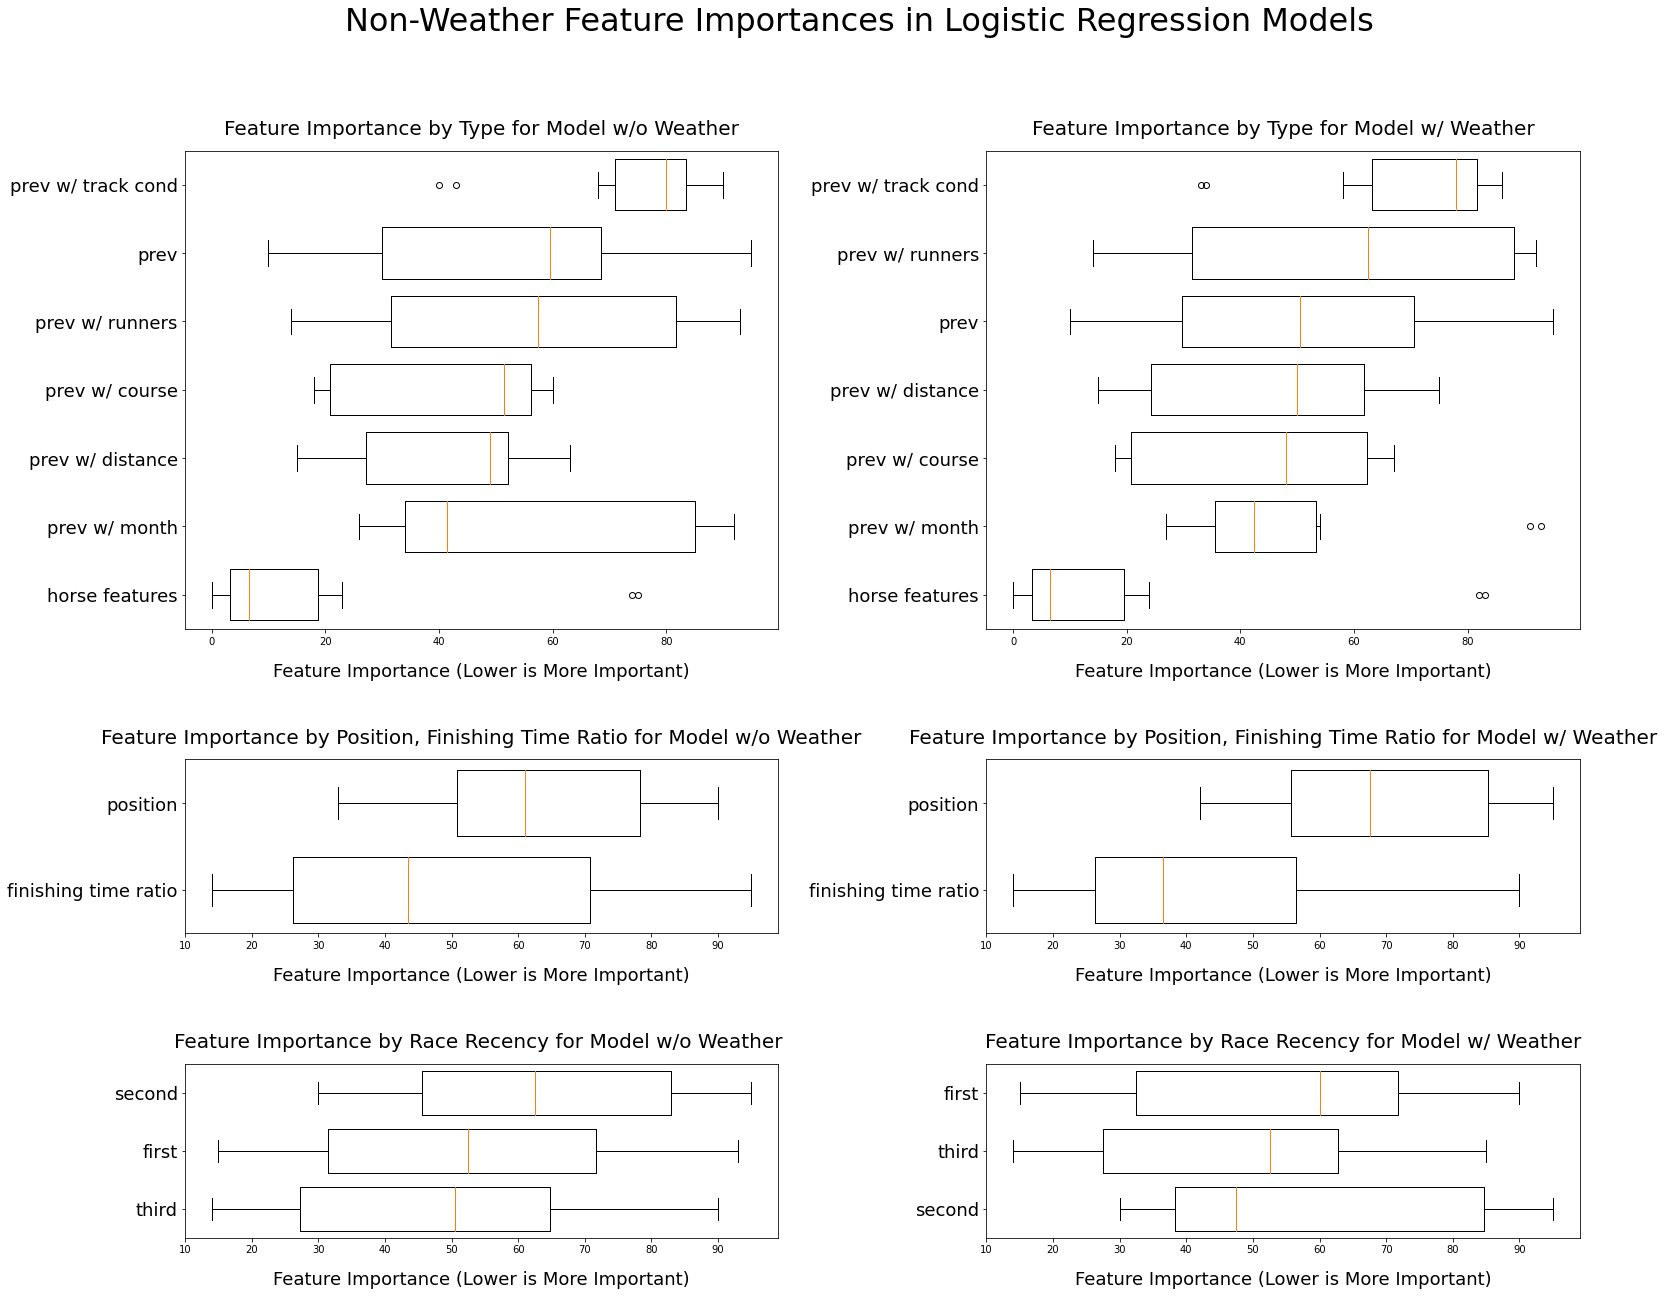

In [62]:
fig = plt.figure(figsize=(25,20))
gs = fig.add_gridspec(4, 2)

fig.suptitle("Non-Weather Feature Importances in Logistic Regression Models", fontsize=32)

ax1 = fig.add_subplot(gs[0:2, 0:1])

data = np.array([
    horse_without_weather,
    unconditioned_without_weather,
    course_without_weather,
    metric_without_weather,
    ncond_without_weather,
    runners_without_weather,
    month_without_weather,
], dtype='object')

labels = np.array([
    "horse features",
    "prev",
    "prev w/ course",
    "prev w/ distance",
    "prev w/ track cond",
    "prev w/ runners",
    "prev w/ month",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax1.set_title("Feature Importance by Type for Model w/o Weather", fontsize=20, pad=16)
ax1.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax1.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax1.set_yticks(np.arange(len(data)) + 1)
ax1.set_yticklabels(labels[sorting_idxs], fontsize=18)

ax2 = fig.add_subplot(gs[0:2, 1:2])

data = np.array([
    horse_with_weather,
    unconditioned_with_weather,
    course_with_weather,
    metric_with_weather,
    ncond_with_weather,
    runners_with_weather,
    month_with_weather,
], dtype='object')

labels = np.array([
    "horse features",
    "prev",
    "prev w/ course",
    "prev w/ distance",
    "prev w/ track cond",
    "prev w/ runners",
    "prev w/ month",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax2.set_title("Feature Importance by Type for Model w/ Weather", fontsize=20, pad=16)
ax2.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax2.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax2.set_yticks(np.arange(len(data)) + 1)
ax2.set_yticklabels(labels[sorting_idxs], fontsize=18)

ax3 = fig.add_subplot(gs[2:3, 0:1])

data = np.array([
    position_without_weather,
    finishing_time_without_weather,
], dtype='object')

labels = np.array([
    "position",
    "finishing time ratio",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax3.set_title("Feature Importance by Position, Finishing Time Ratio for Model w/o Weather", fontsize=20, pad=16)
ax3.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax3.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax3.set_yticks(np.arange(len(data)) + 1)
ax3.set_yticklabels(labels[sorting_idxs], fontsize=18)

ax4 = fig.add_subplot(gs[2:3, 1:2])

data = np.array([
    position_with_weather,
    finishing_time_with_weather,
], dtype='object')

labels = np.array([
    "position",
    "finishing time ratio",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax4.set_title("Feature Importance by Position, Finishing Time Ratio for Model w/ Weather", fontsize=20, pad=16)
ax4.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax4.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax4.set_yticks(np.arange(len(data)) + 1)
ax4.set_yticklabels(labels[sorting_idxs], fontsize=18)

ax5 = fig.add_subplot(gs[3:4, 0:1])

data = [
    third_without_weather,
    first_without_weather,
    second_without_weather,

]

labels = [
    "third",
    "first",
    "second",
]

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax5.set_title("Feature Importance by Race Recency for Model w/o Weather ", fontsize=20, pad=16)
ax5.boxplot(data, positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax5.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax5.set_yticks(np.arange(len(data)) + 1)
ax5.set_yticklabels(labels, fontsize=18)

ax6 = fig.add_subplot(gs[3:4, 1:2])

data = [
    second_with_weather,
    third_with_weather,
    first_with_weather,
]

labels = [
    "second",
    "third",
    "first",
]

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax6.set_title("Feature Importance by Race Recency for Model w/ Weather", fontsize=20, pad=16)
ax6.boxplot(data, positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax6.set_xlabel("Feature Importance (Lower is More Important)", fontsize=18, labelpad=16)
ax6.set_yticks(np.arange(len(data)) + 1)
ax6.set_yticklabels(labels, fontsize=18)

plt.subplots_adjust(hspace = 0.75, wspace = 0.35)
# plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/logistic_regression_non_weather_features.png")

plt.show()

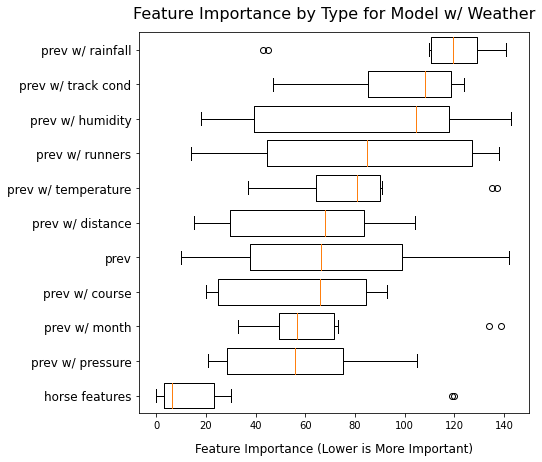

In [87]:
fig = plt.figure(figsize=(7,7))
gs = fig.add_gridspec(1, 1)

# fig.suptitle("Weather Feature Importances in Logistic Regression Model", fontsize=20) #, y=0.95)

ax1 = fig.add_subplot(gs[0:1, 0:1])

data = np.array([
    horse_with_weather_incl_weather,
    unconditioned_with_weather_incl_weather,
    course_with_weather_incl_weather,
    metric_with_weather_incl_weather,
    ncond_with_weather_incl_weather,
    runners_with_weather_incl_weather,
    month_with_weather_incl_weather,
    temp_with_weather_incl_weather,
    msl_with_weather_incl_weather,
    rain_with_weather_incl_weather,
    rhum_with_weather_incl_weather,
], dtype='object')

labels = np.array([
    "horse features",
    "prev",
    "prev w/ course",
    "prev w/ distance",
    "prev w/ track cond",
    "prev w/ runners",
    "prev w/ month",
    "prev w/ temperature",
    "prev w/ pressure",
    "prev w/ rainfall",
    "prev w/ humidity",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax1.set_title("Feature Importance by Type for Model w/ Weather", fontsize=16, pad=14)
ax1.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax1.set_xlabel("Feature Importance (Lower is More Important)", fontsize=12, labelpad=12)
ax1.set_yticks(np.arange(len(data)) + 1)
ax1.set_yticklabels(labels[sorting_idxs], fontsize=12)

plt.subplots_adjust(hspace = 1.5, wspace = 1.5)
# plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/logistic_regression_weather_features.png", bbox_inches='tight')

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,16))
gs = fig.add_gridspec(4, 1)

fig.suptitle("Weather Feature Importances in Logistic Regression Model", fontsize=20) #, y=0.95)

ax1 = fig.add_subplot(gs[0:2, 0:1])

data = np.array([
    horse_with_weather_incl_weather,
    unconditioned_with_weather_incl_weather,
    course_with_weather_incl_weather,
    metric_with_weather_incl_weather,
    ncond_with_weather_incl_weather,
    runners_with_weather_incl_weather,
    month_with_weather_incl_weather,
    temp_with_weather_incl_weather,
    msl_with_weather_incl_weather,
    rain_with_weather_incl_weather,
    rhum_with_weather_incl_weather,
], dtype='object')

labels = np.array([
    "horse features",
    "prev",
    "prev w/ course",
    "prev w/ distance",
    "prev w/ track cond",
    "prev w/ runners",
    "prev w/ month",
    "prev w/ temperature",
    "prev w/ pressure",
    "prev w/ rainfall",
    "prev w/ humidity",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax1.set_title("Feature Importance by Type for Model w/ Weather", fontsize=16, pad=14)
ax1.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax1.set_xlabel("Feature Importance (Lower is More Important)", fontsize=12, labelpad=12)
ax1.set_yticks(np.arange(len(data)) + 1)
ax1.set_yticklabels(labels[sorting_idxs], fontsize=12)

ax4 = fig.add_subplot(gs[2:3, 0:1])

data = np.array([
    position_with_weather_incl_weather,
    finishing_time_with_weather_incl_weather,
], dtype='object')

labels = np.array([
    "position",
    "finishing time ratio",
])

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax4.set_title("Feature Importance by Position, Finishing Time Ratio for Model w/ Weather", fontsize=16, pad=14)
ax4.boxplot(data[sorting_idxs], positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax4.set_xlabel("Feature Importance (Lower is More Important)", fontsize=12, labelpad=12)
ax4.set_yticks(np.arange(len(data)) + 1)
ax4.set_yticklabels(labels[sorting_idxs], fontsize=12)

ax6 = fig.add_subplot(gs[3:4, 0:1])

data = [
    third_with_weather_incl_weather,
    first_with_weather_incl_weather,
    second_with_weather_incl_weather,
]

labels = [
    "third",
    "first",
    "second",
]

sorting_idxs = np.argsort(np.array([np.median(x) for x in data]))

ax6.set_title("Feature Importance by Race Recency for Model w/ Weather", fontsize=16, pad=14)
ax6.boxplot(data, positions=np.arange(len(data)) + 1, vert=False, widths=0.75)
ax6.set_xlabel("Feature Importance (Lower is More Important)", fontsize=12, labelpad=12)
ax6.set_yticks(np.arange(len(data)) + 1)
ax6.set_yticklabels(labels, fontsize=12)

plt.subplots_adjust(hspace = 1.5, wspace = 0)
# plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/logistic_regression_weather_features.png")

plt.show()

---